## Pandas 의 연산

### 그룹화

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
titanic = sns.load_dataset('titanic')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [7]:
# 필요한 컬럼 골라내기
df = titanic[['age','sex','class','fare','survived']]
print(df.head())

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [8]:
grouped = df.groupby(['class'])
print(grouped)

In [9]:
for key, group in grouped:
    print(key, group)

First       age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]
Second       age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000         1
880  25.0  female  Second  26.

C:\Users\USER\AppData\Local\Temp\ipykernel_14804\4187541178.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


In [10]:
# 그룹 별 집계 가능
print(grouped.mean())

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


C:\Users\USER\AppData\Local\Temp\ipykernel_14804\3123997789.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.mean())


In [11]:
# 개별 그룹 가져오기
group1 = grouped.get_group('First')
print(group1.head())

     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


In [12]:
grouped_two = df.groupby(['class','sex'])
for key, group in grouped_two:
    print(key)

('First', 'female')
('First', 'male')
('Second', 'female')
('Second', 'male')
('Third', 'female')
('Third', 'male')


In [ ]:
# 집계 함수 사용
print(grouped.std())
print(grouped[['fare'].std()])
print(grouped.fare.std())

In [17]:
# 사용자 정의 함수 적용

# group 에 적용하게 되면 매개변수로 각 가릅이 대입되는 구조
def f(group):
    return group.max()

# 하나의 함수 적용
agg_f = grouped.agg(f)
print(agg_f)

# 여러 개 함수 적용
agg_two = grouped.agg([min,max])
print(agg_two)

# 열마다 다른 함수 적용
agg_three = grouped.agg({'fare' : min, 'age' : min})
print(agg_three)

         age   sex      fare  survived
class                                 
First   80.0  male  512.3292         1
Second  70.0  male   73.5000         1
Third   74.0  male   69.5500         1
         age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1
        fare   age
class             
First    0.0  0.92
Second   0.0  0.67
Third    0.0  0.42


In [19]:
# 셀 단위로 함수 적용 - transform 이나 apply 사용
def z_score(x):
    return (x - x.mean()) / x.std()

agg_zscore = grouped.age.transform(z_score)
print(agg_zscore.head())

# SQL 의 Having 을 만들고자 할 때는 filter 함수를 이용
# 그룹화 한 항목의 필터링은 그룹의 집계함수를 이용해서 필터링을 수행

# 행의 개수가 300개 넘는 그룹의 데이터만 추출
group_filter = grouped.filter(lambda x : len(x) > 300)
for x in group_filter:
    print(x)

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64
age
sex
class
fare
survived


In [27]:
# print(df)

# 2개의 컬럼으로 그룹화 - 멀티인덱스 생성
grouped = df.groupby(['class','sex'])

# First 클래스이고 sex가 male 인 데이터만 골라오기
gdf = grouped.mean()
print(gdf.loc[('First', 'male')])
print(gdf.xs('male', level = 'sex'))

age         41.281386
fare        67.226127
survived     0.368852
Name: (First, male), dtype: float64
              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


In [29]:
pd.pivot_table(df, index = 'sex', columns = 'class', values = 'age', aggfunc = 'mean')

class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


## 서울시 구별 CCTV와 인구 데이터 사용

### 필요한 라이브러리 import

In [5]:
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib.pyplot as plt

# 시각화할 때 한글 출력
import platform
from matplotlib import font_manager, rc

cctv = pd.read_excel('./data3/cctv.xlsx')
print(cctv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB
None


In [6]:
# pop.txt 는 처음 2개의 행은 의미가 없음
# 한글을 포함
# 구문 기호는 tab
# 천 단위 구분 기호가 존재

pop = pd.read_csv('./data3/pop.txt', skiprows= 2, delimiter= '\t', thousands=',')
print(pop.head())

         기간  자치구       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9077    4024    5053   1.99     27605  
2    62997    9243    4507    4736   1.96     23980  
3   117430   14287    7910    6377   2.03     38884  
4   148120    6605    2885    3720   2.15     45591  


### 컬럼 이름 변경

In [7]:
# 컬럼 이름 변경
cctv.rename(columns = {cctv.columns[0]: '구별'}, inplace = True)
pop.rename(columns = {pop.columns[1]: '구별'}, inplace = True)

# cctv의 구이름에는 중간에 공백이 존재하고 pop은 구 이름에는 공백이 없음

gu = []
for x in cctv['구별']:
    gu.append(x.replace(' ', ''))

cctv['구별'] = gu

print(cctv.head())
print(pop.head())

    구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강남구  5221    1944.0  195.0  316.0    430    546    765    577    448
1  강동구  1879     303.0  387.0  134.0     59    144    194    273    385
2  강북구  1265     243.0   88.0  141.0     74    145    254      1    319
3  강서구  1617     219.0  155.0  118.0    230    187    190    264    254
4  관악구  3985     430.0   56.0  419.0    487    609    619    694    671
         기간   구별       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9

### 불 필요한 열과 행 제거

In [18]:
# pop 데이터에서 기간, 구별, 계, 남자, 여자 열만 필요
pop = pop[['기간','구별','계','남자','여자']]

#pop 데이터의 첫 번째 행은 전체 데이터의 집계라서 불필요
pop.drop([0], inplace=True)

# 새로운 열을 추가 - 없는 열 이름에 데이터를 대입
pop['여성비율'] = pop['여자'] / pop['계'] * 100
print(pop)

          기간    구별       계      남자      여자       여성비율
1   2021.2/4   종로구  155106   75009   80097  51.640169
2   2021.2/4    중구  132259   64526   67733  51.212394
3   2021.2/4   용산구  240665  116858  123807  51.443708
4   2021.2/4   성동구  295767  143927  151840  51.337708
5   2021.2/4   광진구  355306  170624  184682  51.978295
6   2021.2/4  동대문구  352259  172865  179394  50.926733
7   2021.2/4   중랑구  394679  194556  200123  50.705257
8   2021.2/4   성북구  443206  212849  230357  51.975154
9   2021.2/4   강북구  306093  148824  157269  51.379483
10  2021.2/4   도봉구  322419  156843  165576  51.354294
11  2021.2/4   노원구  520005  250532  269473  51.821232
12  2021.2/4   은평구  479409  229241  250168  52.182583
13  2021.2/4  서대문구  317699  150608  167091  52.594122
14  2021.2/4   마포구  379984  177998  201986  53.156449
15  2021.2/4   양천구  454288  222538  231750  51.013894
16  2021.2/4   강서구  582995  280822  302173  51.831148
17  2021.2/4   구로구  424582  210936  213646  50.319137
18  2021.2/4   금천구  244685  

In [19]:
df = pd.merge(cctv, pop, on = '구별')
print(df)

      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   

### 불필요한 열 삭제

In [20]:
# ~2017년까지 열을 삭제 
# del 을 이용, pandas 에서는 비추천
del df['2011년 이전']
del df['2012년']
del df['2013년']
del df['2014년']
del df['2015년']
del df['2016년']
del df['2017년']
del df['기간']
print(df)

,구별,소계,2018년,계,남자,여자,여성비율
0,강남구,5221,448,536107,256449,279658,52.164587
1,강동구,1879,385,469094,230388,238706,50.886603
2,강북구,1265,319,306093,148824,157269,51.379483
3,강서구,1617,254,582995,280822,302173,51.831148
4,관악구,3985,671,502698,251713,250985,49.927591
5,광진구,1581,346,355306,170624,184682,51.978295
6,구로구,3227,486,424582,210936,213646,50.319137
7,금천구,1634,530,244685,124394,120291,49.161575
8,노원구,1906,156,520005,250532,269473,51.821232
9,도봉구,858,71,322419,156843,165576,51.354294


### 인덱스 설정

In [21]:
df.set_index('구별', inplace=True)
print(df)

        소계  2018년       계      남자      여자       여성비율
구별                                                  
강남구   5221    448  536107  256449  279658  52.164587
강동구   1879    385  469094  230388  238706  50.886603
강북구   1265    319  306093  148824  157269  51.379483
강서구   1617    254  582995  280822  302173  51.831148
관악구   3985    671  502698  251713  250985  49.927591
광진구   1581    346  355306  170624  184682  51.978295
구로구   3227    486  424582  210936  213646  50.319137
금천구   1634    530  244685  124394  120291  49.161575
노원구   1906    156  520005  250532  269473  51.821232
도봉구    858     71  322419  156843  165576  51.354294
동대문구  2003    197  352259  172865  179394  50.926733
동작구   1780    255  397231  191657  205574  51.751751
마포구   1935    195  379984  177998  201986  53.156449
서대문구  2121    194  317699  150608  167091  52.594122
서초구   2835    396  422174  202027  220147  52.146035
성동구   2679    294  295767  143927  151840  51.337708
성북구   3003    643  443206  212849  230357  51.

In [23]:
# matplotlib 의 기본 폰트가 한글을 지원하지 않음
# 운영 체제별로 폰트의 이치가 다르므로 조건문ㅇ르 이용해서 설정
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
elif platform.system() == "Darwin":
    rc('font', family = 'AppleGothic')

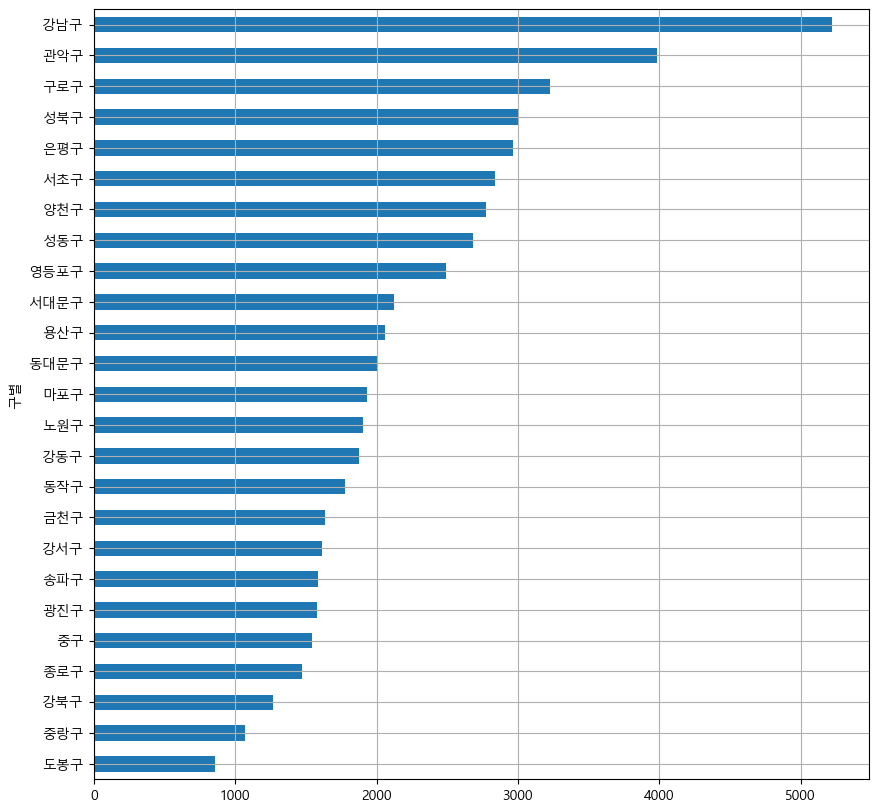

In [25]:
df['소계'].sort_values().plot(kind = 'barh', grid =True, figsize =(10, 10))
plt.show()

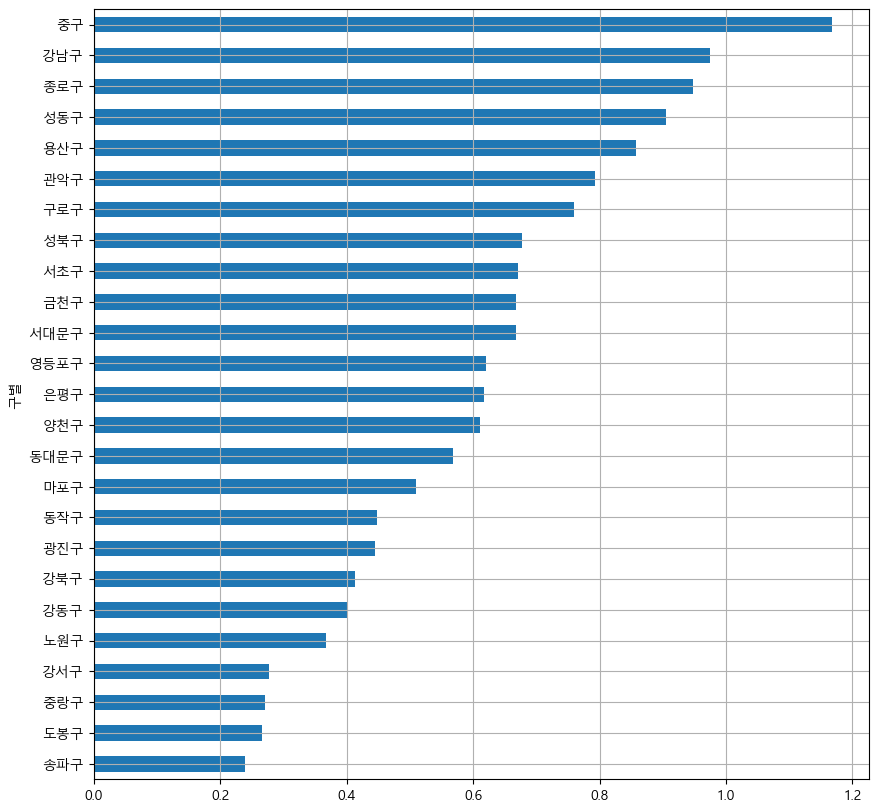

In [26]:
df['cctv비율'] = df['소계'] / df['계'] * 100
df['cctv비율'].sort_values().plot(kind = 'barh', grid =True, figsize =(10, 10))
plt.show()

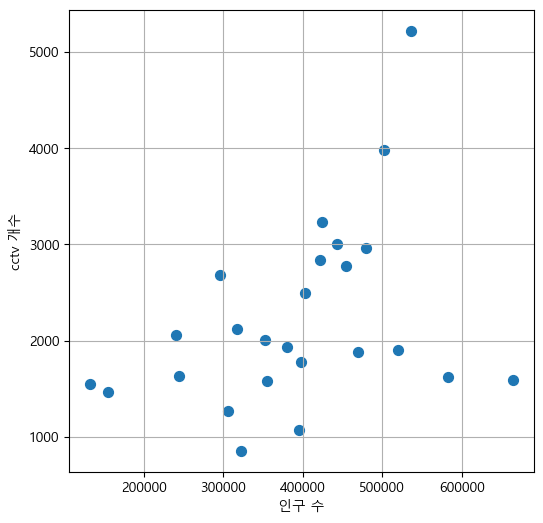

In [27]:
# matplotlib 에서 제공하는 시각화를 활용
plt.figure(figsize = (6, 6))
plt.scatter(df['계'], df['소계'], s = 50)
plt.xlabel('인구 수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()

# 산점도를 그리는 경우 방향성과 그룹화 가능성을 확인

 
0.002892 x + 1087


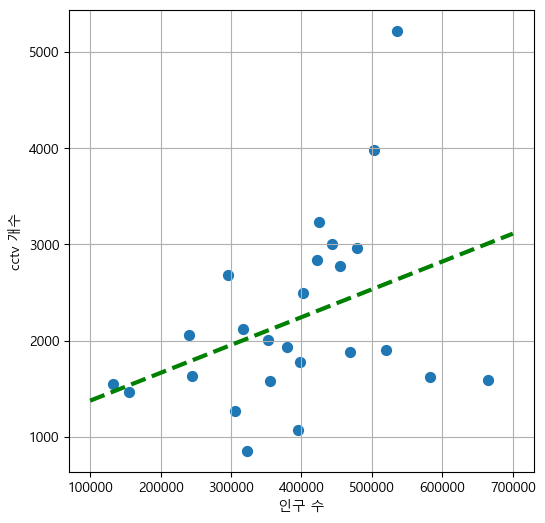

In [32]:
# 2개의 데이터 간의 단항식을 구해서 출력
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)

# 산점도와 단항식을 같이 출력
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize = (6, 6))
plt.scatter(df['계'], df['소계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
plt.xlabel('인구 수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()

# 산점도를 그리는 경우 방향성과 그룹화 가능성을 확인

 
0.002892 x + 1087


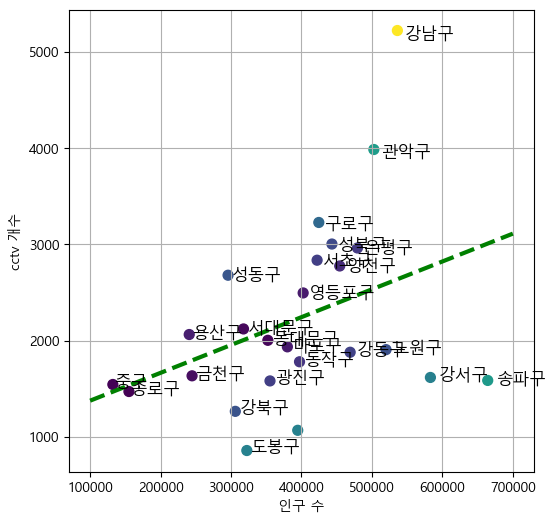

In [34]:
# 2개의 데이터 간의 단항식을 구해서 출력
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)

# 산점도와 단항식을 같이 출력
fx = np.linspace(100000, 700000, 100)

df['오차'] = np.abs(df['소계'] - f1(df['계']))

plt.figure(figsize = (6, 6))
plt.scatter(df['계'], df['소계'], c = df['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(24):
    plt.text(df['계'][n] * 1.02, df['소계'][n] * 0.98, df.index[n], fontsize = 12)
    
plt.xlabel('인구 수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()

# 산점도를 그리는 경우 방향성과 그룹화 가능성을 확인

In [37]:
# 멀티 인덱스로 사용할 데이터 생성
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2015'), ('cust_1','2016'), ('cust_2', '2015'), ('cust_2','2016')])
data = pd.DataFrame(data = np.arange(16).reshape(4,4), index = mul_index, columns = ['prd_1', 'prd_2', 'prd_3', 'prd_4'], dtype = 'int')
print(data)

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15


In [39]:
# 컬럼들이 하위 인덱스가 됨
data_stacked = data.stack(dropna = False)
print(data_stacked)

cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32


In [40]:
data = pd.read_csv('./data3/macrodata.csv')
print(data.head())

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


In [41]:
# 시계열 인덱스 생성
periods = pd.PeriodIndex(year = data['year'], quarter = data['quarter'], name = 'date')
print(periods)

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)


In [44]:
columns = pd.Index(['realgdp', 'infi', 'unemp'], name = 'item')
# print(columns)

data = data.reindex(columns = columns)
print(data)

item    realgdp  infi  unemp
0      2710.349   NaN    5.8
1      2778.801   NaN    5.1
2      2775.488   NaN    5.3
3      2785.204   NaN    5.6
4      2847.699   NaN    5.2
..          ...   ...    ...
198   13324.600   NaN    6.0
199   13141.920   NaN    6.9
200   12925.410   NaN    8.1
201   12901.504   NaN    9.2
202   12990.341   NaN    9.6

[203 rows x 3 columns]


In [45]:
data.index = periods.to_timestamp('D', 'end') # 쿼터의 마지막 날을 세부 데이터로 설정
print(data)

item                             realgdp  infi  unemp
date                                                 
1959-03-31 23:59:59.999999999   2710.349   NaN    5.8
1959-06-30 23:59:59.999999999   2778.801   NaN    5.1
1959-09-30 23:59:59.999999999   2775.488   NaN    5.3
1959-12-31 23:59:59.999999999   2785.204   NaN    5.6
1960-03-31 23:59:59.999999999   2847.699   NaN    5.2
...                                  ...   ...    ...
2008-09-30 23:59:59.999999999  13324.600   NaN    6.0
2008-12-31 23:59:59.999999999  13141.920   NaN    6.9
2009-03-31 23:59:59.999999999  12925.410   NaN    8.1
2009-06-30 23:59:59.999999999  12901.504   NaN    9.2
2009-09-30 23:59:59.999999999  12990.341   NaN    9.6

[203 rows x 3 columns]


In [46]:
ldata = data.stack().reset_index().rename(columns = {0 : 'value'})
print(ldata)

                             date     item      value
0   1959-03-31 23:59:59.999999999  realgdp   2710.349
1   1959-03-31 23:59:59.999999999    unemp      5.800
2   1959-06-30 23:59:59.999999999  realgdp   2778.801
3   1959-06-30 23:59:59.999999999    unemp      5.100
4   1959-09-30 23:59:59.999999999  realgdp   2775.488
..                            ...      ...        ...
401 2009-03-31 23:59:59.999999999    unemp      8.100
402 2009-06-30 23:59:59.999999999  realgdp  12901.504
403 2009-06-30 23:59:59.999999999    unemp      9.200
404 2009-09-30 23:59:59.999999999  realgdp  12990.341
405 2009-09-30 23:59:59.999999999    unemp      9.600

[406 rows x 3 columns]


In [47]:
pivoted = ldata.pivot('date', 'item', 'value')
print(pivoted)

item                             realgdp  unemp
date                                           
1959-03-31 23:59:59.999999999   2710.349    5.8
1959-06-30 23:59:59.999999999   2778.801    5.1
1959-09-30 23:59:59.999999999   2775.488    5.3
1959-12-31 23:59:59.999999999   2785.204    5.6
1960-03-31 23:59:59.999999999   2847.699    5.2
...                                  ...    ...
2008-09-30 23:59:59.999999999  13324.600    6.0
2008-12-31 23:59:59.999999999  13141.920    6.9
2009-03-31 23:59:59.999999999  12925.410    8.1
2009-06-30 23:59:59.999999999  12901.504    9.2
2009-09-30 23:59:59.999999999  12990.341    9.6

[203 rows x 2 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_17896\1025289545.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = ldata.pivot('date', 'item', 'value')


In [50]:
data = pd.DataFrame({'cust_id' : [1,2,3,4], 'prod_id' : ['A', 'B', 'C','D'], 'pch_cnt' : [1,2,3,4], 'pch_price' : [100, 200, 300, 400], 'pch_amt' : [10, 20, 30, 40]})
# print(data)

result = pd.melt(data, id_vars = ['cust_id', 'prod_id'])
print(result)

    cust_id prod_id   variable  value
0         1       A    pch_cnt      1
1         2       B    pch_cnt      2
2         3       C    pch_cnt      3
3         4       D    pch_cnt      4
4         1       A  pch_price    100
5         2       B  pch_price    200
6         3       C  pch_price    300
7         4       D  pch_price    400
8         1       A    pch_amt     10
9         2       B    pch_amt     20
10        3       C    pch_amt     30
11        4       D    pch_amt     40


In [54]:
data = pd.DataFrame({
    'id' : ['id1','id1','id1','id2','id2','id3'],
    'fac_1' : ['a', 'a', 'a', 'b', 'b', 'c'],
    'fac_2' : ['d', 'd', 'd', 'c', 'c', 'd']})

# fac_1 과 fac_2 의 빈도분석
print(pd.crosstab(data['fac_1'], data['fac_2'], rownames = ['사실'], colnames = ['거짓'], normalize = True))
print(pd.crosstab(data.id, [data['fac_1'], data['fac_2']]))

거짓         c         d
사실                    
a   0.000000  0.500000
b   0.333333  0.000000
c   0.000000  0.166667
fac_1  a  b  c
fac_2  d  c  d
id            
id1    3  0  0
id2    0  2  0
id3    0  0  1


## Data PreProcessing

In [60]:
# 첫 번째 행이 컬럼 이름이 아닌 경우 직접 컬럼 이름 설정
df = pd.read_csv('./data4/auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','name']
# print(df.head())

# 데이터의 자료형 확인은 dtypes 이나 info() 함수를 이용
# print(df.dtypes)
print(df.info())

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [65]:
# horsepower는 마력인데 마력은 숫자 데이터
# 현재 자료형을 보면 object로 만들어져있음
# df['horsepower'] = df['horsepower'].astype('float') - 에러 발생

# 중복된 값을 제거하고 출력
# print(df['horsepower'].unique())
# print(df['horsepower'].sort_values())

# ? 라는 값을 가진 데이터를 어떻게 할 지 결정
# ? 값을 None 으로 설정하고 제거
df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
133    100.0
98     100.0
256    100.0
107    100.0
334    100.0
       ...  
126        ?
374        ?
354        ?
32         ?
336        ?
Name: horsepower, Length: 398, dtype: object


In [ ]:
# origin 열은 1,2,3 값만 소유
# 이 값은 미국, 유럽, 일본을 의미하는 숫자
# 분석을 할 때는 미국, 유럽, 일본으로 보여지는 것이 좋을 수 있음
# 이 경우 새로운 컬럼을 초가해서 보여지도록 할 수 있고 컬럼의 값을 변경할 수도 있음
# 범주형으로 변경해 두는 것이 분석 속도를 높이는데 도움이 됨

In [67]:
df['origin'].replace({1 : '미국', 2 : '유럽', 3 : '일본'}, inplace = True)
df['origin'] = df['origin'].astype('category') # 범주형으로 변환
# df.info()
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year origin                       name  
0          70     미국  chevrolet chevelle malibu  
1          70     미국          buick skylark 320  
2          70     미국         plymouth satellite  
3          70     미국              amc rebel sst  
4          70     미국                ford torino  
